In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving cryptoData.csv to cryptoData (1).csv


In [ ]:
dataf = pd.read_csv("cryptoData.csv")

In [ ]:
dataf.columns

Index(['unix', 'data', 'symbol', 'open', 'high', 'low', 'close', 'Volume XRP',
       'Volume USDT'],
      dtype='object')

In [ ]:
dataf = dataf.rename(columns={'data': 'ds', 'close': 'y'})
dataf.columns


Index(['unix', 'ds', 'symbol', 'open', 'high', 'low', 'y', 'Volume XRP',
       'Volume USDT'],
      dtype='object')

In [ ]:
model = Prophet()
model.fit(dataf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hzhmwck/7acg4def.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hzhmwck/hzdswyml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51031', 'data', 'file=/tmp/tmp0hzhmwck/7acg4def.json', 'init=/tmp/tmp0hzhmwck/hzdswyml.json', 'output', 'file=/tmp/tmp0hzhmwck/prophet_model7gdp7nwi/prophet_model-20230919191334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=10)

In [ ]:
forecast = model.predict(future)

In [ ]:
#Print the results
forecasted_prices = forecast[["ds","yhat"]].tail(10)
print("Forecasted Price: ")
print(forecasted_prices)

Forecasted Price: 
             ds      yhat
1334 2021-12-28  1.012646
1335 2021-12-29  1.010737
1336 2021-12-30  1.008569
1337 2021-12-31  1.008119
1338 2022-01-01  1.011810
1339 2022-01-02  1.010391
1340 2022-01-03  1.012934
1341 2022-01-04  1.013787
1342 2022-01-05  1.012514
1343 2022-01-06  1.010977


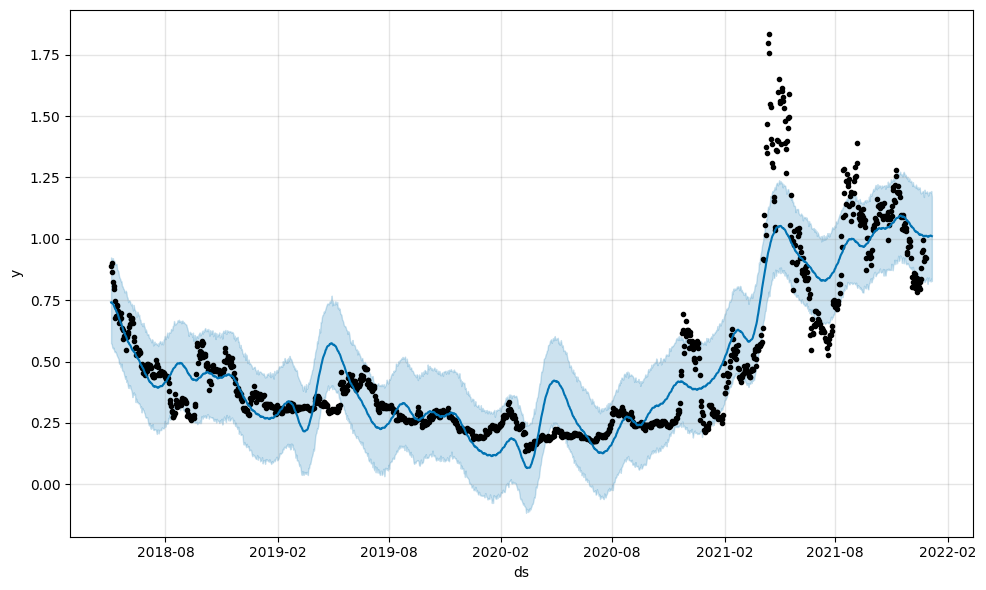

In [ ]:
fig = model.plot(forecast)
plt.show()

In [ ]:
# Prediction Interval coverage
forecasted_values = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
actual_values = dataf[["ds", "y"]]
merged = forecasted_values.merge(actual_values, on = "ds", how="left")

In [ ]:
correct_coverage = ((merged['y'] >= merged["yhat_lower"]) & (merged['y'] <= merged["yhat_upper"])).sum()/len(merged) * 100
print(correct_coverage)

83.77976190476191


In [ ]:
dataf["ds"] = pd.to_datetime(dataf["ds"])